<a href="https://colab.research.google.com/github/sameersat96/Netflix-movies-and-TV-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/Netflix movies and TV shows clustering - Sameer Satpute/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
netflix_df.shape

(7787, 12)

In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
netflix_df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [11]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
# Count of null or missing values.
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [14]:
# Count of null or missing values.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#Counting number of duplicate values
netflix_df.duplicated().sum()

0

In [16]:
  
def Convert(string):
    li = list(string.split(","))
    return li



In [17]:
column_names = ["listed_in"]
listed_in_df = pd.DataFrame(columns = column_names)

In [18]:
listed_in_df['listed_in']=netflix_df['listed_in'].apply(lambda x:Convert(x))

In [19]:
list_1=[]
for i in listed_in_df['listed_in']:
  list_1.append(i)
flat_list = list(np.concatenate(list_1).flat)
flat_list_listed_in_unique=set(flat_list)
len(set(flat_list))

73

In [20]:
netflix_df['listed_in']=netflix_df['listed_in'].replace('Anime Features','Anime')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('Anime Series','Anime')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('tv', '')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('TV', '')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('Shows', '')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('Movies', '')
netflix_df['listed_in'] = netflix_df['listed_in'].replace('Stand-Up Comedy & Talk', 'Stand-Up Comedy')

In [21]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])

In [22]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [23]:
netflix_df['description'] = netflix_df['description'].str.replace(',', ' ')

In [24]:
netflix_df.shape

(7770, 12)

In [25]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world rag-doll robots hi...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Exploratory Data Analysis

In [26]:
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [27]:
import plotly.express as px
#Plotting graph for cabin
labels=['Movie','TV Show']
fig = px.pie(netflix_df['type'], values=netflix_df['type'].value_counts(),
            names=labels,
            color=labels, 
            color_discrete_map={'Movie':'darkred','TV Show':'white'},
            hole = 0.4,width=700,height=500,template= "plotly_dark")
fig.show()


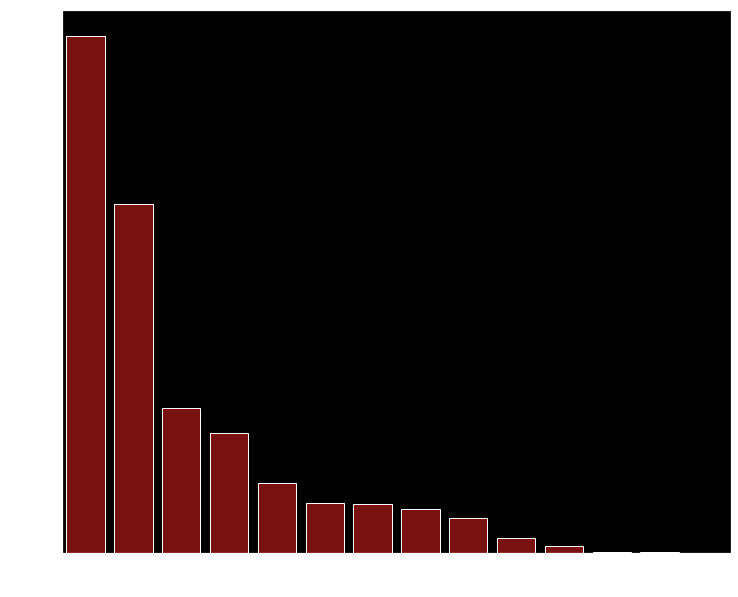

In [28]:
#Movie rating analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.set(style="ticks")
plt.style.use("dark_background")
ax = sns.countplot(x="rating", data=netflix_df, palette=["darkred"], order=netflix_df['rating'].value_counts().index[0:15],edgecolor="white")

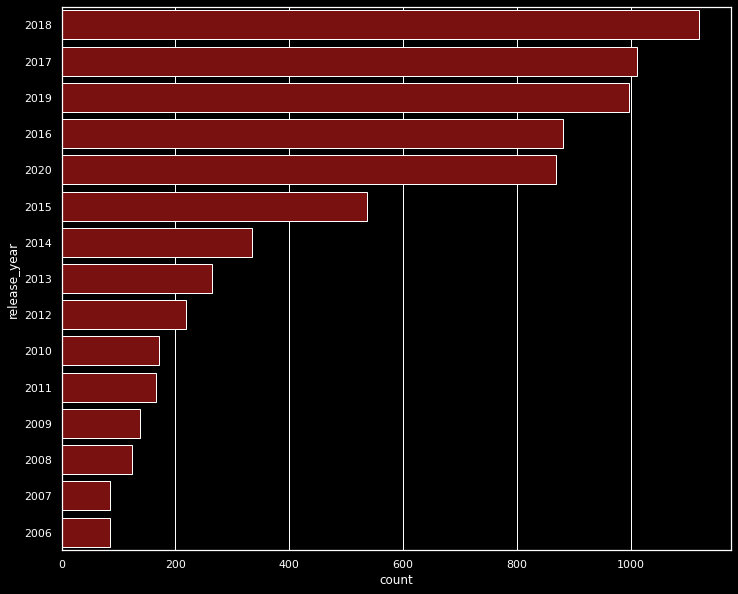

In [29]:
# Year wise analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plt.style.use('dark_background')
ax = sns.countplot(y="release_year", data=netflix_df, palette=['darkred'], order=netflix_df['release_year'].value_counts().index[0:15],edgecolor="white")

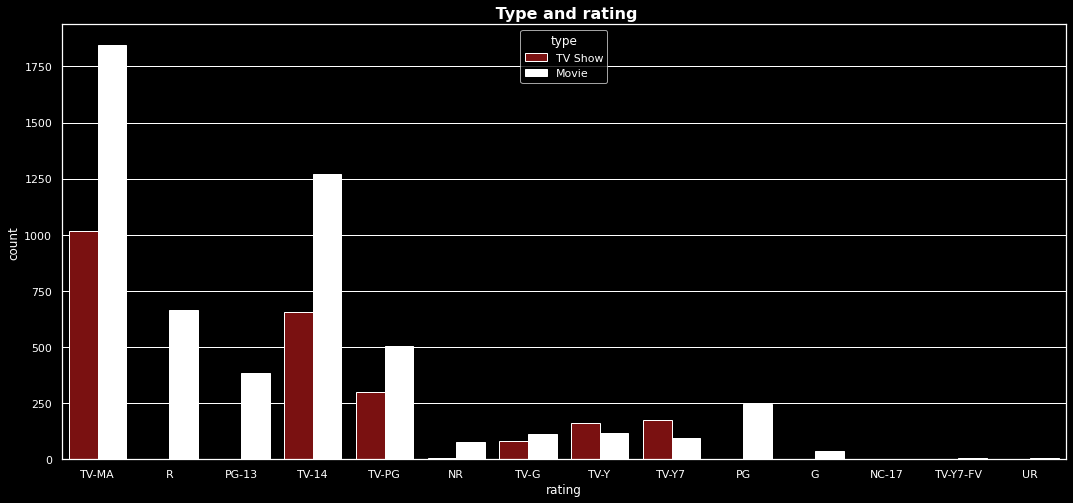

In [30]:
# Rating
plt.figure(figsize=(18,8))
plt.style.use("dark_background")
sns.countplot(x='rating',hue='type',data=netflix_df,palette=["darkred","white"])
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

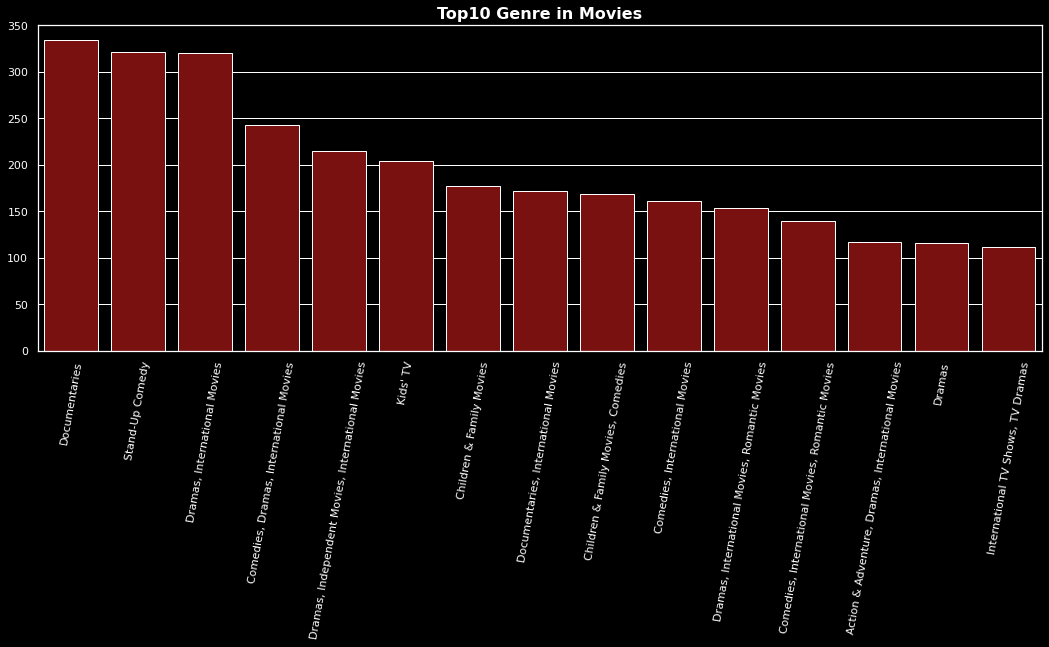

In [31]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
plt.style.use("dark_background")
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette=["darkred"],edgecolor = "white")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

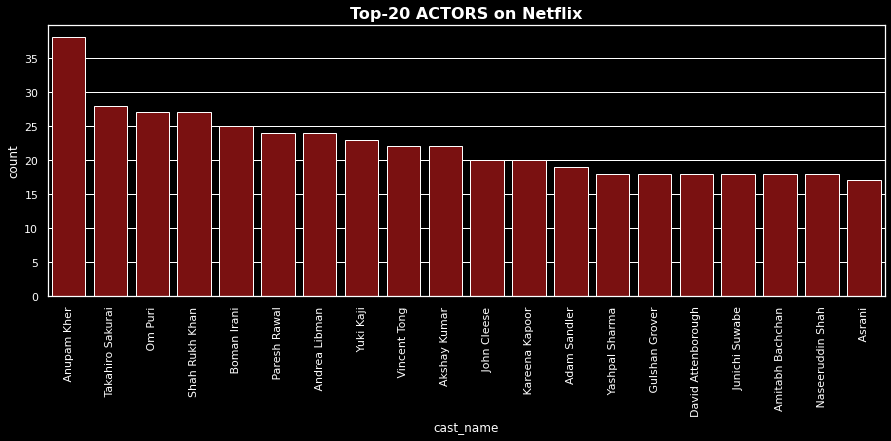

In [32]:
# Top 20 actors netflix
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
plt.style.use("dark_background")
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette=["darkred"],edgecolor="white")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

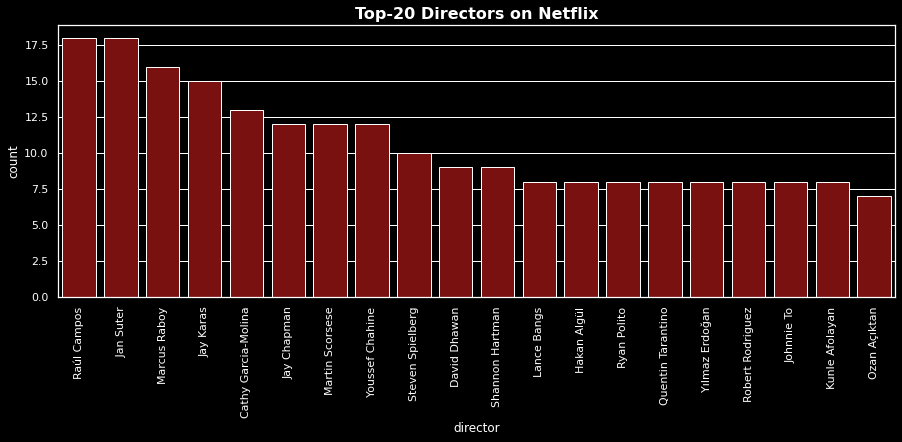

In [33]:
# Top 20 actors netflix
netflix_df['director'] = netflix_df['director'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['director']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'director', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
plt.style.use("dark_background")
sns.barplot(x='director',y='count',data=df_cast_count,palette=["darkred"],edgecolor="white")
plt.title("Top-20 Directors on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [34]:
netflix_df['duration']=netflix_df['duration'].str.replace('Season','')
netflix_df['duration']=netflix_df['duration'].str.replace('s','')
netflix_df['duration']=netflix_df['duration'].str.replace('min','')

netflix_df['duration']=netflix_df['duration'].astype(str).astype(int)
netflix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



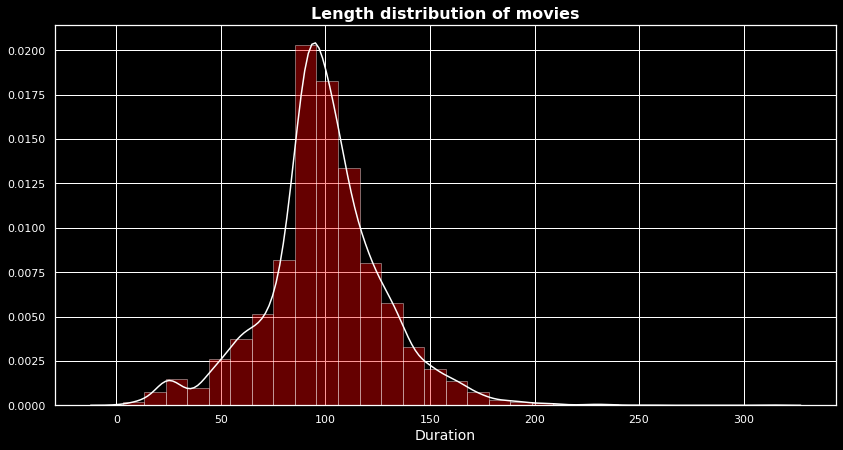

In [35]:
# Length distribution of movies
movie_df = netflix_df[netflix_df['type']=='Movie']

plt.figure(figsize=(14, 7))
plt.style.use("dark_background")
sns.distplot(movie_df['duration'], bins=30,color='red',kde_kws={"color":"white"}).set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [36]:
# Season-wise distribution of tv shows
tv_df = netflix_df[netflix_df['type']=='TV Show']
tv_df['duration'].value_counts()
tv=tv_df['duration'].value_counts().T.reset_index()
fig = px.bar(x=tv['index'], y=tv['duration'],title="Season wise distribution of TV Shows",template= "plotly_dark")
fig.update_traces(marker_color='darkred', marker_line_color='white',marker_line_width=2, opacity=1)
fig.show()

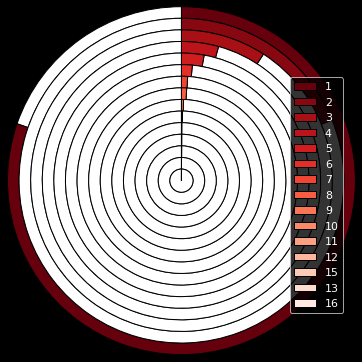

In [37]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

labels = tv['index']
data = tv['duration']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)
#radius of donut chart
r = 2
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.Reds_r(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "black")
plt.style.use("dark_background")
plt.legend()
plt.show()

In [38]:
#necessary imports for plotly and map
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [39]:
# all country df
all_countries = netflix_df.groupby(['country','type']).count()['show_id'].reset_index()
all_countries.head()

,country,type,show_id
0,Argentina,Movie,34
1,Argentina,TV Show,16
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1


In [40]:
#country wise content for top countries
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count']) 

d = country_df.sort_values(by=['count'], ascending=False).head(10)
# .plot.bar(x='country',y='count',edgecolor='black')
fig = px.bar(d, x='country',y='count',template= "plotly_dark")
fig.update_traces(marker_color='darkred', marker_line_color='white',marker_line_width=2, opacity=1)
fig.update_layout(title='Content produced country wise')
fig.show()
top_30 = country_df.sort_values(by=['count'], ascending=False)['country'].head(30)

In [41]:
#total content per country
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'],
#             autocolorscale =True,
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
#         projection = dict(
#             type = 'natural earth'
#         )
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [42]:
#subsetting data for visualisation
d1 = netflix_df[netflix_df["type"] == "TV Show"]
d2 = netflix_df[netflix_df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(255, 255, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')